<a href="https://colab.research.google.com/github/dovalless/CHATBOT-DEEP-LEARNING-CON-EMBEDDINGS/blob/main/CHATBOT_DEEP_LEARNING_CON_EMBEDDINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Modelo Deep Learning entrenado

🤖 Chatbot Deep Learning
Escribe 'salir' para terminar

Tú: hola
🤖: Hola 👋 ¿en qué puedo ayudarte?


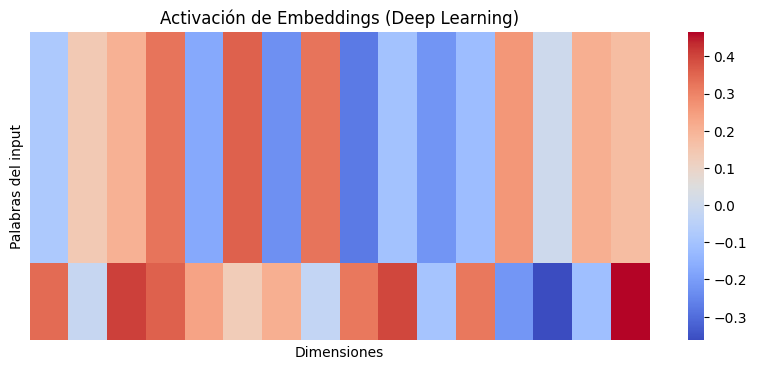

🔎 Confianza del modelo: 1.00
--------------------------------------------------
Tú: mi nombre es darwin
🤖 No estoy seguro de entenderte 🤔


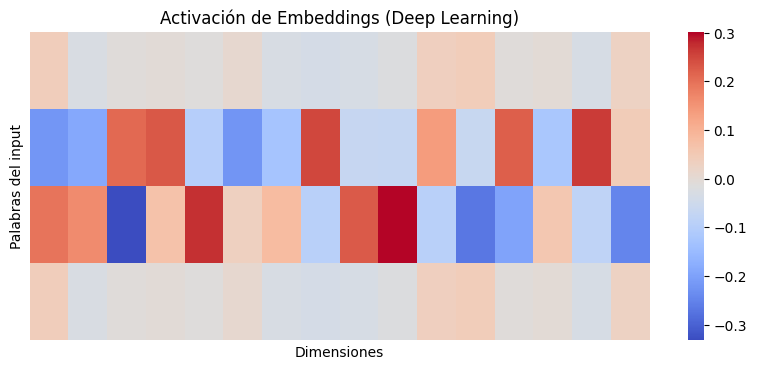

🔎 Confianza del modelo: 0.57
--------------------------------------------------
Tú: como estas
🤖: Estoy funcionando correctamente 🤖


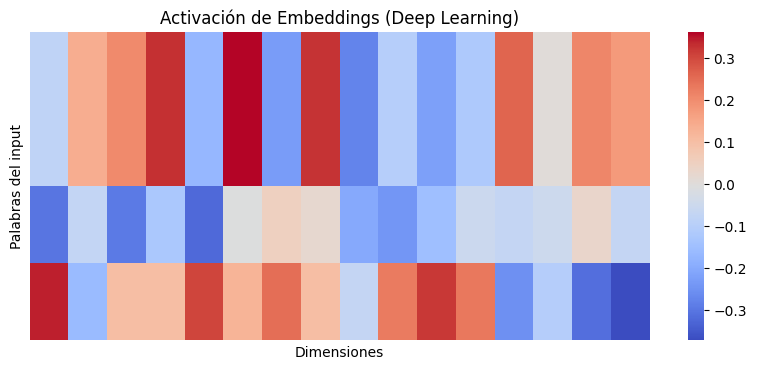

🔎 Confianza del modelo: 0.99
--------------------------------------------------
Tú: como funcionas ?
🤖: Estoy funcionando correctamente 🤖


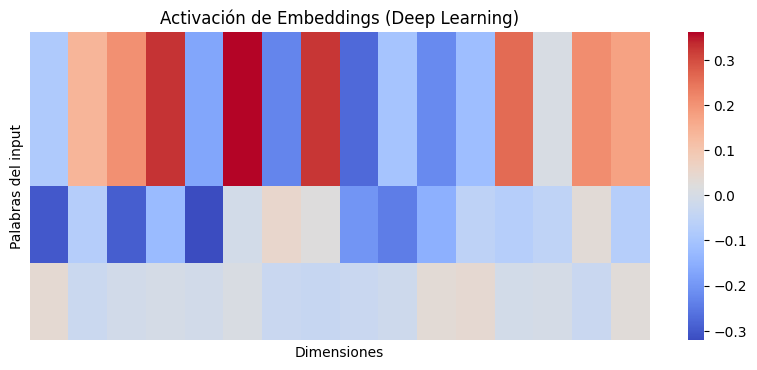

🔎 Confianza del modelo: 0.74
--------------------------------------------------
Tú: avion
🤖: Hasta luego 👋


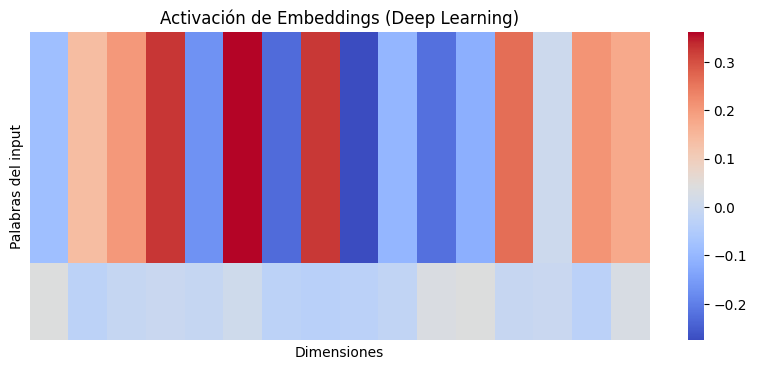

🔎 Confianza del modelo: 0.61
--------------------------------------------------
Tú: como te llamas ?
🤖: Estoy funcionando correctamente 🤖


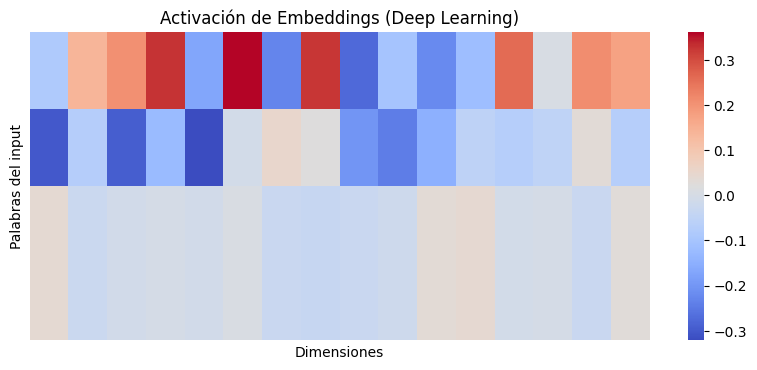

🔎 Confianza del modelo: 0.73
--------------------------------------------------


KeyboardInterrupt: Interrupted by user

In [1]:
# ==========================================
# CHATBOT DEEP LEARNING CON EMBEDDINGS
# ==========================================

!pip install tensorflow nltk matplotlib seaborn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

nltk.download("punkt")

# ==========================================
# DATASET (más variado)
# ==========================================

texts = [
    "hola",
    "hola como estas",
    "buenos dias",
    "buenas tardes",
    "como estas",
    "que tal estas",
    "quien eres",
    "cual es tu nombre",
    "que es inteligencia artificial",
    "explica la inteligencia artificial",
    "que es programacion",
    "para que sirve programar",
    "adios",
    "hasta luego",
    "nos vemos"
]

intents = [
    "saludo",
    "saludo",
    "saludo",
    "saludo",
    "estado",
    "estado",
    "identidad",
    "identidad",
    "ia",
    "ia",
    "programacion",
    "programacion",
    "despedida",
    "despedida",
    "despedida"
]

responses = {
    "saludo": "Hola 👋 ¿en qué puedo ayudarte?",
    "estado": "Estoy funcionando correctamente 🤖",
    "identidad": "Soy un modelo de Deep Learning educativo",
    "ia": "La inteligencia artificial permite que las máquinas aprendan patrones",
    "programacion": "Programar es crear instrucciones para computadoras",
    "despedida": "Hasta luego 👋"
}

# ==========================================
# TOKENIZACIÓN Y EMBEDDINGS
# ==========================================

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
max_len = max(len(seq) for seq in sequences)

X = pad_sequences(sequences, maxlen=max_len)

encoder = LabelEncoder()
y = encoder.fit_transform(intents)
y = to_categorical(y)

vocab_size = len(tokenizer.word_index) + 1

# ==========================================
# MODELO DEEP LEARNING
# ==========================================

input_layer = Input(shape=(max_len,))
embedding = Embedding(
    input_dim=vocab_size,
    output_dim=16,
    name="Embedding"
)(input_layer)

flat = Flatten()(embedding)
dense1 = Dense(32, activation="relu")(flat)
drop = Dropout(0.3)(dense1)
output = Dense(y.shape[1], activation="softmax")(drop)

model = Model(inputs=input_layer, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X, y, epochs=500, verbose=0)
print("✅ Modelo Deep Learning entrenado")

# ==========================================
# MODELO PARA VISUALIZAR EMBEDDINGS
# ==========================================

embedding_model = Model(
    inputs=model.input,
    outputs=model.get_layer("Embedding").output
)

# ==========================================
# CHAT INTERACTIVO
# ==========================================

def chat():
    print("\n🤖 Chatbot Deep Learning")
    print("Escribe 'salir' para terminar\n")

    while True:
        text = input("Tú: ").lower()
        if text == "salir":
            print("🤖 Hasta luego")
            break

        seq = tokenizer.texts_to_sequences([text])
        padded = pad_sequences(seq, maxlen=max_len)

        prediction = model.predict(padded, verbose=0)
        confidence = np.max(prediction)
        intent_index = np.argmax(prediction)
        intent = encoder.inverse_transform([intent_index])[0]

        if confidence < 0.6:
            print("🤖 No estoy seguro de entenderte 🤔")
        else:
            print("🤖:", responses[intent])

        # ==========================================
        # VISUALIZACIÓN DE EMBEDDINGS
        # ==========================================

        embeddings = embedding_model.predict(padded, verbose=0)[0]

        plt.figure(figsize=(10,4))
        sns.heatmap(
            embeddings,
            cmap="coolwarm",
            cbar=True,
            xticklabels=False,
            yticklabels=False
        )
        plt.title("Activación de Embeddings (Deep Learning)")
        plt.xlabel("Dimensiones")
        plt.ylabel("Palabras del input")
        plt.show()

        print(f"🔎 Confianza del modelo: {confidence:.2f}")
        print("-"*50)

# ==========================================
# INICIAR CHAT
# ==========================================

chat()
